In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')


In [2]:
#import dataset
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

In [5]:
df.loc[df.isnull().any(axis=1)]
#no null values in any columns/rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [6]:
df.loc[df.isna().any(axis=1)]
#no na values in any columns/rows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


# EDA

In [7]:
df.describe().transpose()
#there are a few columns with 0's and a few columns with outliers, we will revisit them later

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
# # of rows with 0's

for each_col in df.columns:
    print(each_col + " : " + str(len(df.loc[df[each_col] == 0])))

cement : 0
slag : 471
ash : 566
water : 0
superplastic : 379
coarseagg : 0
fineagg : 0
age : 0
strength : 0


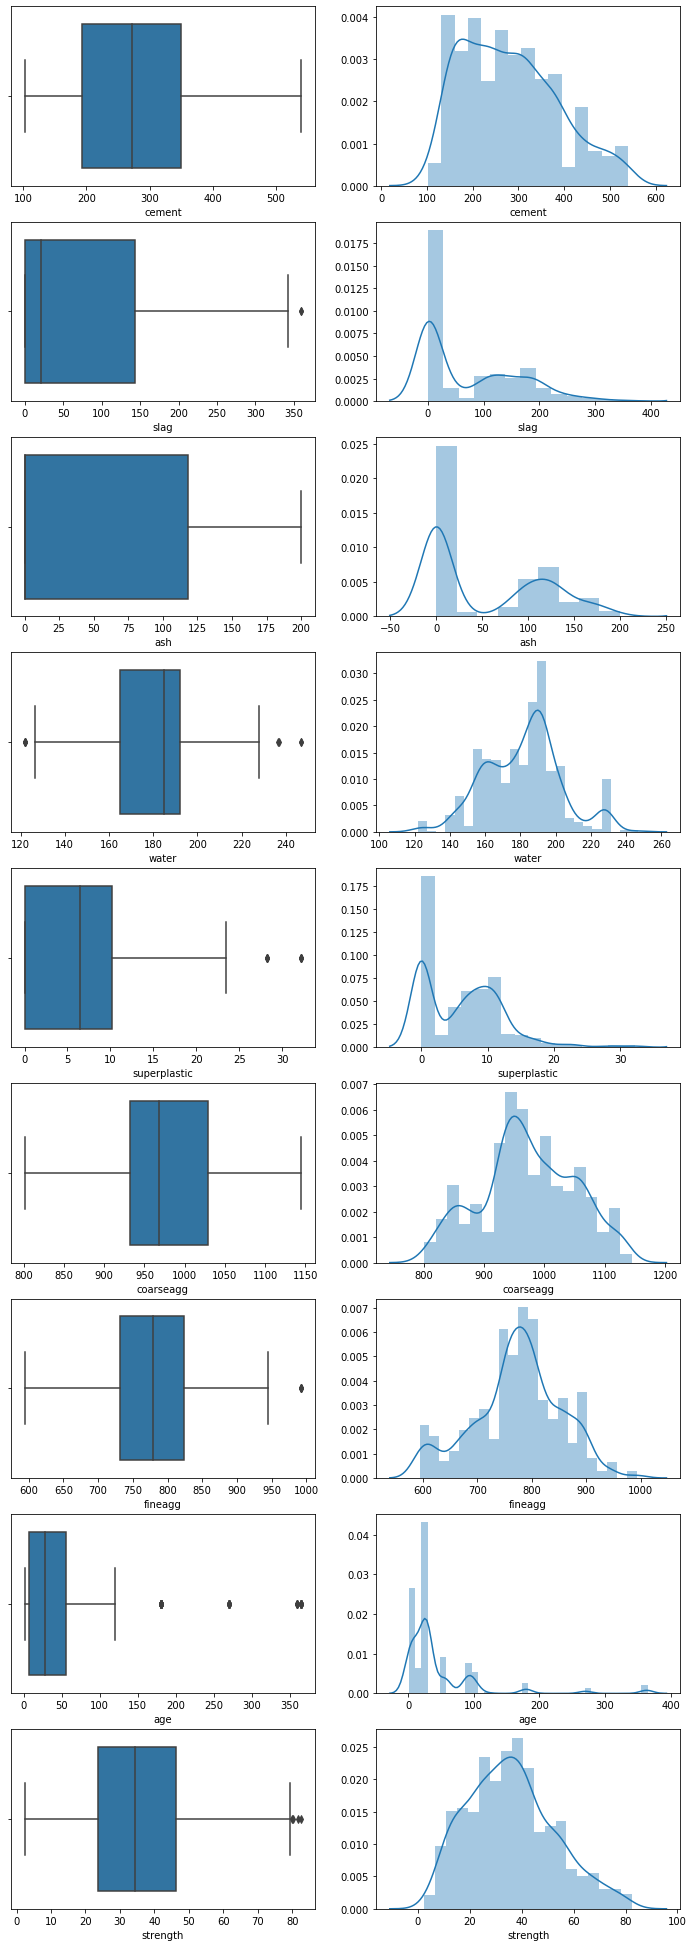

In [10]:
#plot  univariate charts

fig, ax =plt.subplots(9,2, figsize=(12,35))

i = 0
for each_col in df.columns:
    
    sns.boxplot(df[each_col], ax=ax[i,0])
    sns.distplot(df[each_col], ax=ax[i,1])
    i += 1

    
#we see a few variables that have many 0 values which skews the distribution.

In [11]:
df.iloc[:,:-2]

,cement,slag,ash,water,superplastic,coarseagg,fineagg
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7
...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0


In [12]:
# split target variable strength into three types <30 , 30-50, >50

df['strengthtype'] = np.where(df['strength'] >= 30, np.where(df['strength'] >= 50, '>50', '>30 and <50'), '<30')

In [13]:
df['age'].sort_values().value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

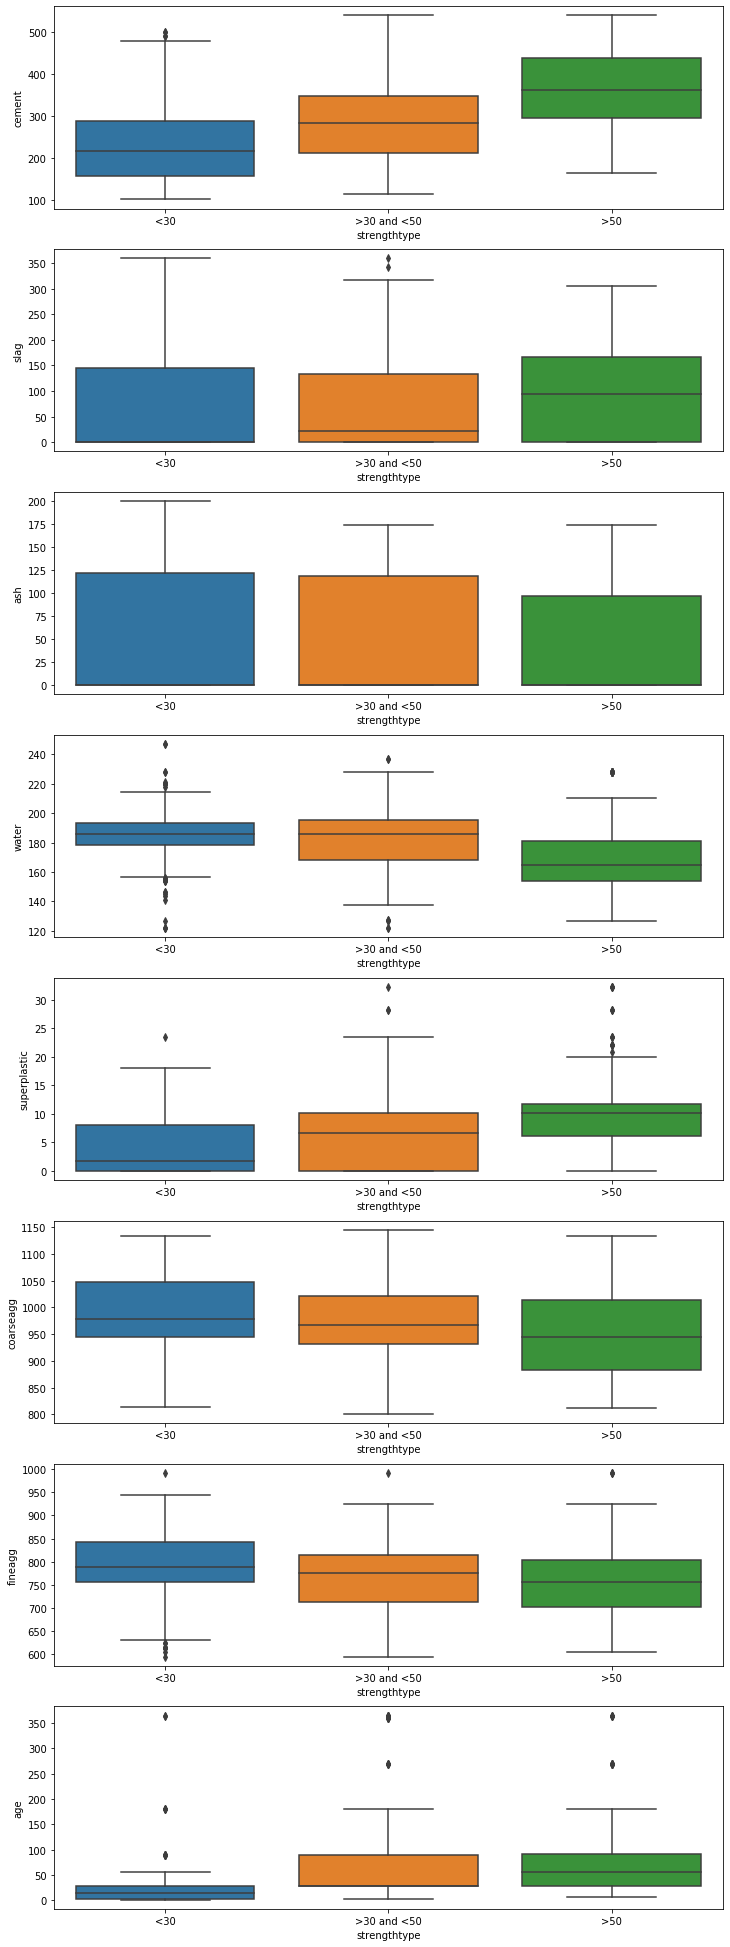

In [14]:
fig, ax =plt.subplots(8,1, figsize=(12,35))

i = 0
for each_col in df.iloc[:,:-2].columns:
    
    sns.boxplot(x = 'strengthtype' , y = each_col, data = df, ax=ax[i])
    #sns.distplot(df[each_col], ax=ax[i,1])
    i += 1
    
# given the below plots, cement, water, superplastic, coarseagg, fineagg  seem to be able to correlate to strength

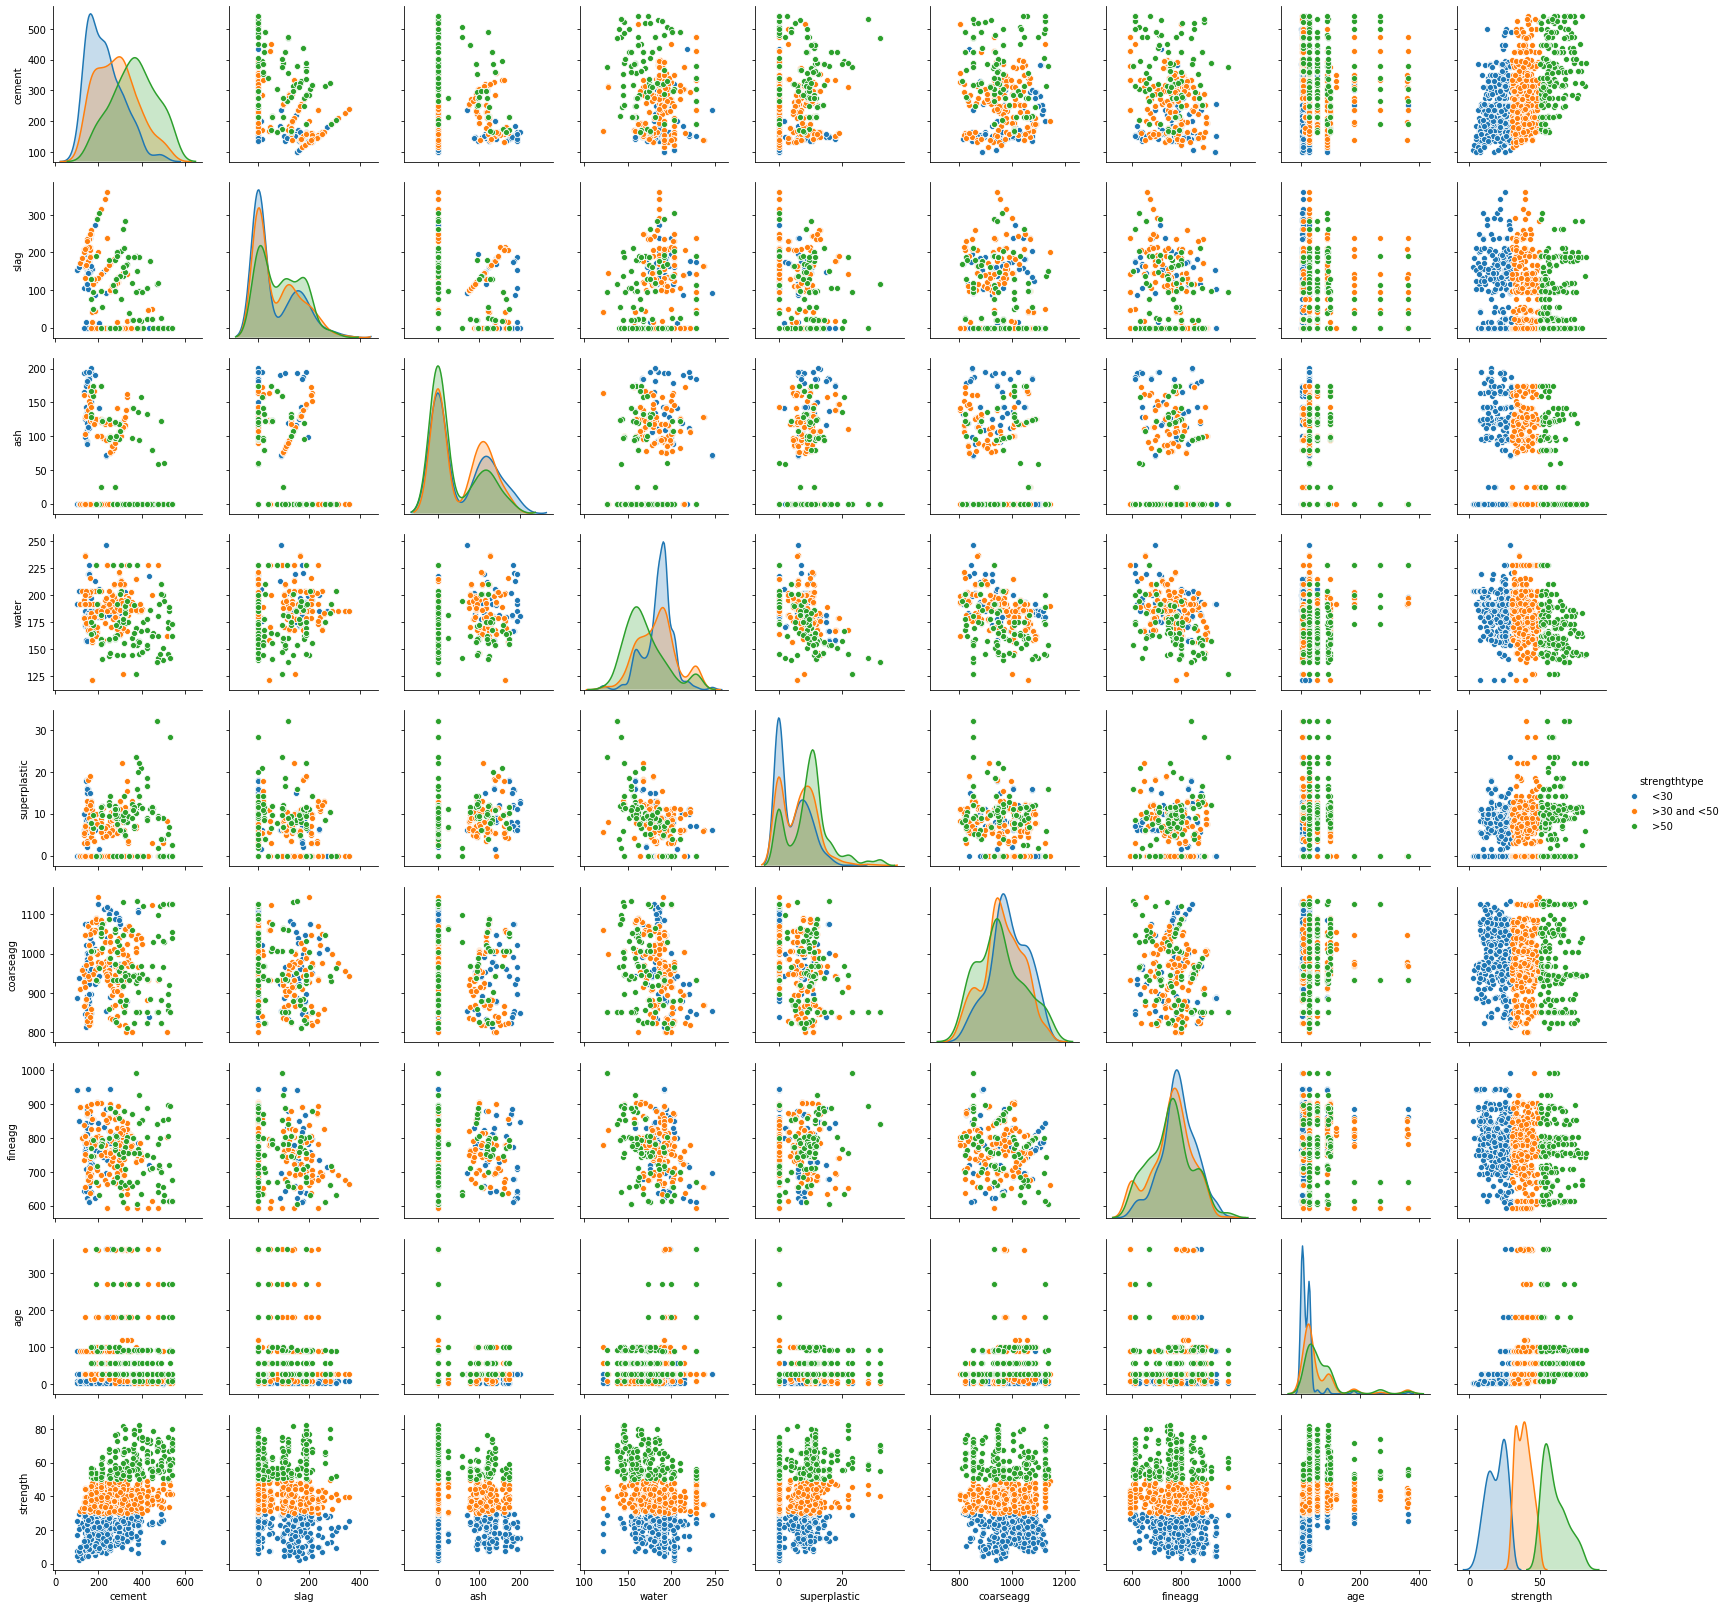

In [15]:
sns.pairplot(df, diag_kind = 'kde', hue = 'strengthtype')

In [16]:
# we have slag, ash and superplastic which have 0 values and skew the distribution. There are too many
# of them to just lose.
# exploring the data further to see if we can find something about them

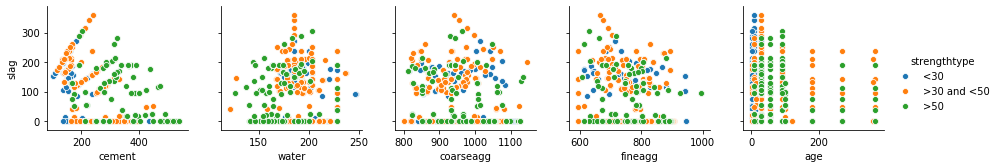

In [17]:
sns.pairplot(df, y_vars = 'slag', 
             x_vars = ['cement', 'water','coarseagg','fineagg', 'age'],
             hue = 'strengthtype')

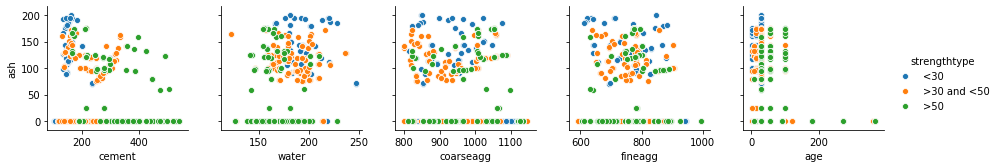

In [18]:
sns.pairplot(df, y_vars = 'ash', 
             x_vars = ['cement', 'water','coarseagg','fineagg', 'age'],
             hue = 'strengthtype')

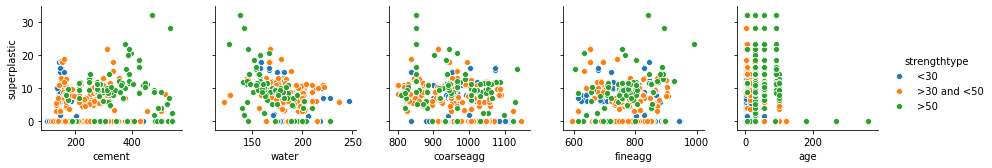

In [19]:
sns.pairplot(df, y_vars = 'superplastic', 
             x_vars = ['cement', 'water','coarseagg','fineagg', 'age'],
             hue = 'strengthtype')

In [20]:
# i would like to create some more features, one way is to add those columns with 0's to those 
# columns that are more evenly distributed and hopefully we will have a less skewed and tailed distribution
# of the combine cols

In [21]:
df_features = df


In [22]:
ls_colnames = ['cement','water', 'fineagg', 'coarseagg','age']
ls_cols_with_0 = ['slag', 'ash', 'superplastic']

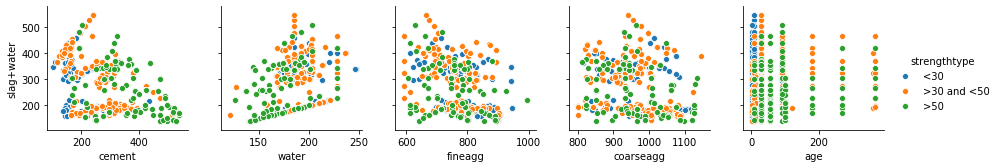

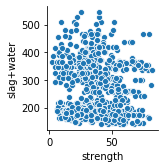

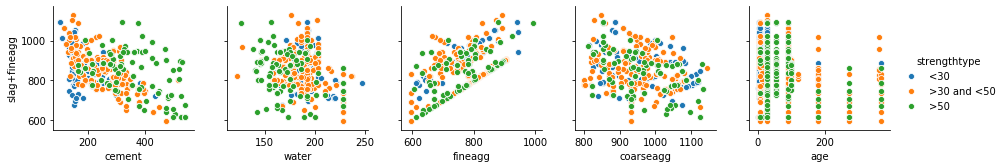

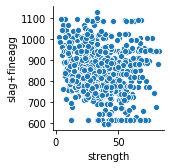

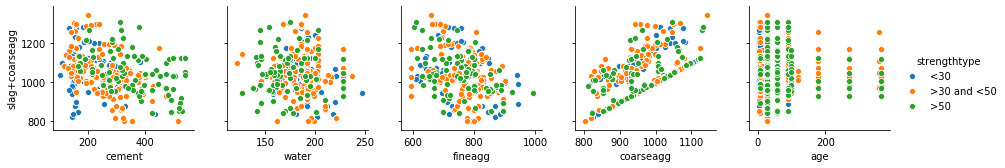

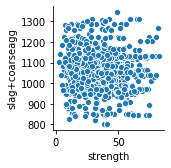

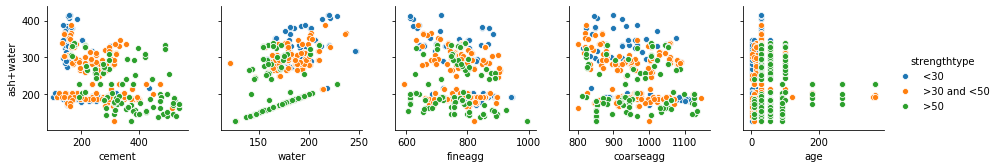

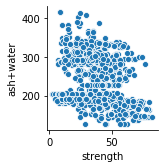

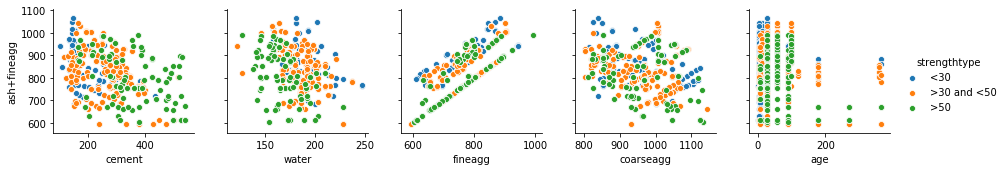

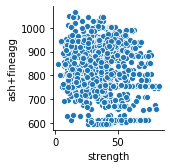

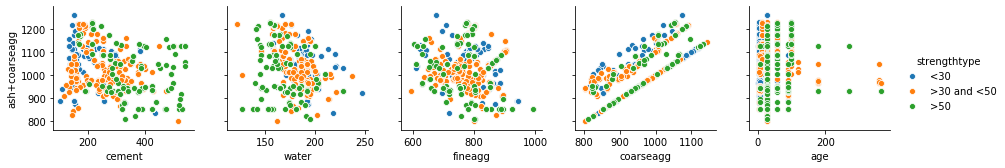

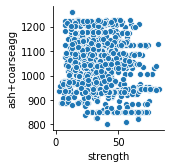

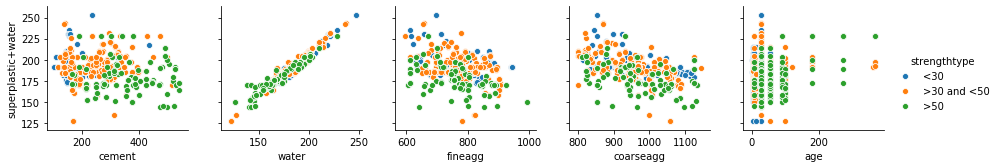

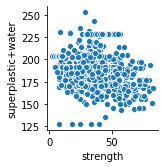

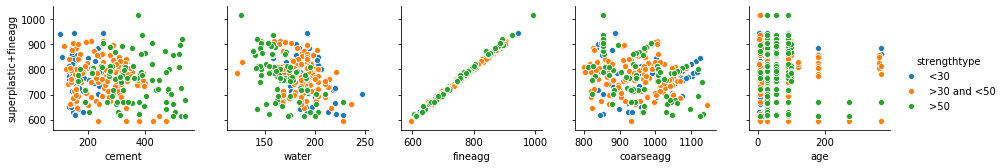

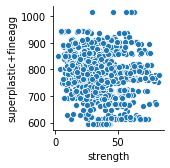

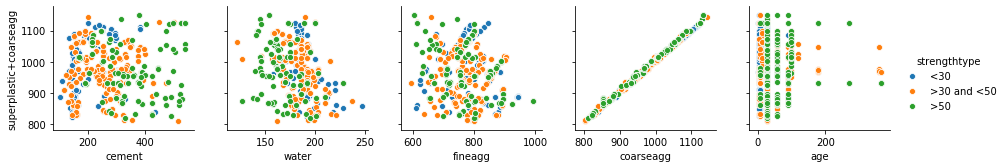

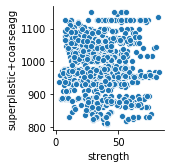

In [23]:
for each_col_with_0 in ls_cols_with_0:
    for i in range(1,4):
        df_features[each_col_with_0 + '+' +ls_colnames[i]] = df_features[each_col_with_0] + df_features[ls_colnames[i]]
        sns.pairplot(df_features, y_vars = each_col_with_0 + '+' + ls_colnames[i],
                    x_vars = ls_colnames,
                    hue = 'strengthtype')
        sns.pairplot(df_features, y_vars = each_col_with_0 + '+' +ls_colnames[i], 
                     x_vars = 'strength')

# exploring how data would look if we add a few variables together

In [24]:
df_features.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strengthtype,slag+water,slag+fineagg,slag+coarseagg,ash+water,ash+fineagg,ash+coarseagg,superplastic+water,superplastic+fineagg,superplastic+coarseagg
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,<30,415.5,960.5,1183.8,203.5,748.5,971.8,203.5,748.5,971.8
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,<30,200.5,838.4,1123.0,282.6,920.5,1205.1,169.1,807.0,1091.6
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,<30,187.4,861.2,956.9,283.1,956.9,1052.6,192.9,866.7,962.4
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,>30 and <50,342.0,784.0,1046.0,228.0,670.0,932.0,228.0,670.0,932.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,<30,376.7,880.1,1230.8,193.3,696.7,1047.4,202.4,705.8,1056.5


In [25]:
# how about some further work to combine cols

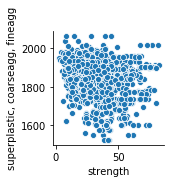

In [26]:
#there's a negative weak correlation between 'superplastic + coarseagg + fineagg' and strength

df_features['superplastic, coarseagg, fineagg'] = df_features['superplastic'] +df_features['coarseagg'] +df_features['slag']+df_features['fineagg']
sns.pairplot(df_features, y_vars = 'superplastic, coarseagg, fineagg', x_vars = 'strength')

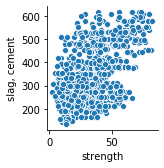

In [27]:
#there's a fairly good correlation between 'slag + cement' & strength

df_features['slag, cement'] = df_features['slag'] +df_features['cement']
sns.pairplot(df_features, y_vars = 'slag, cement', x_vars = 'strength')

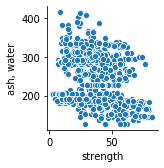

In [28]:
#there's a weak negative correlation between 'ash + water' and strength
df_features['ash, water'] = df_features['ash'] +df_features['water']
sns.pairplot(df_features, y_vars = 'ash, water', x_vars = 'strength')

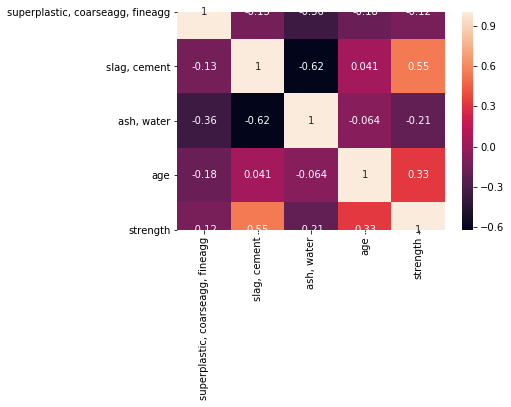

In [29]:
# look at the correlations
sns.heatmap(df_features[['superplastic, coarseagg, fineagg','slag, cement','ash, water','age', 'strength']].corr(),annot=True)

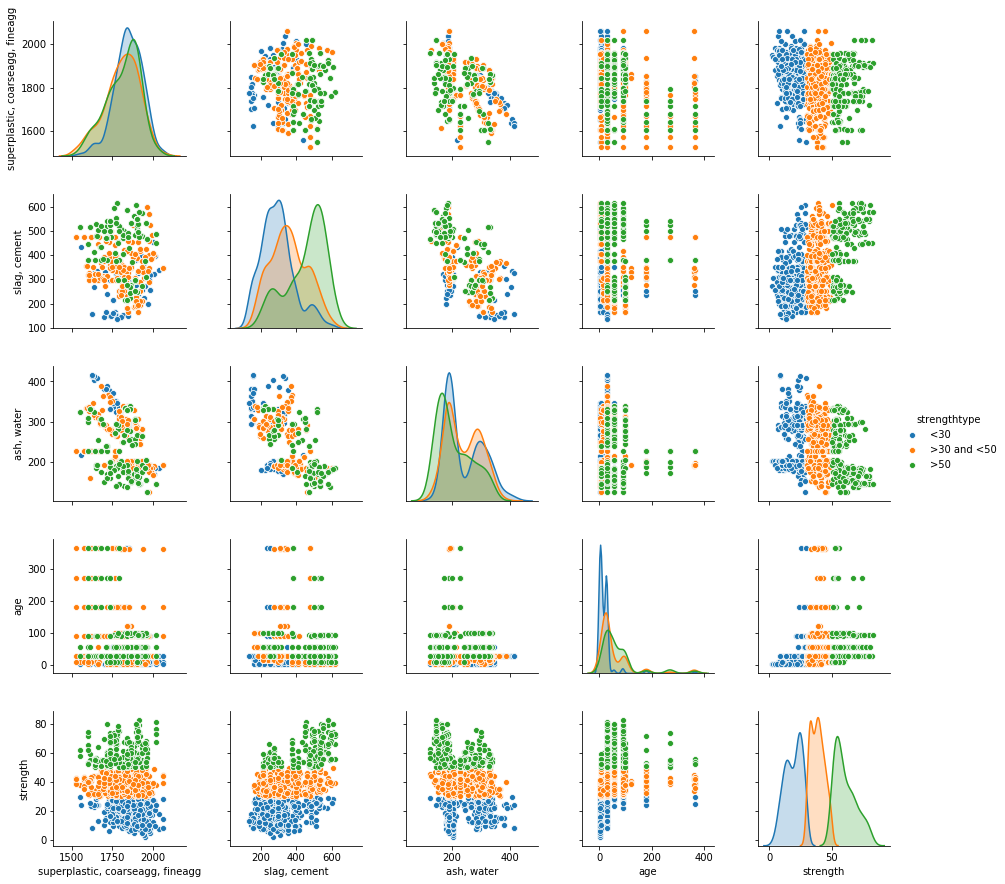

In [30]:
sns.pairplot(df_features[['superplastic, coarseagg, fineagg','slag, cement','ash, water','age', 'strength', 'strengthtype']], 
            hue = 'strengthtype')

# 

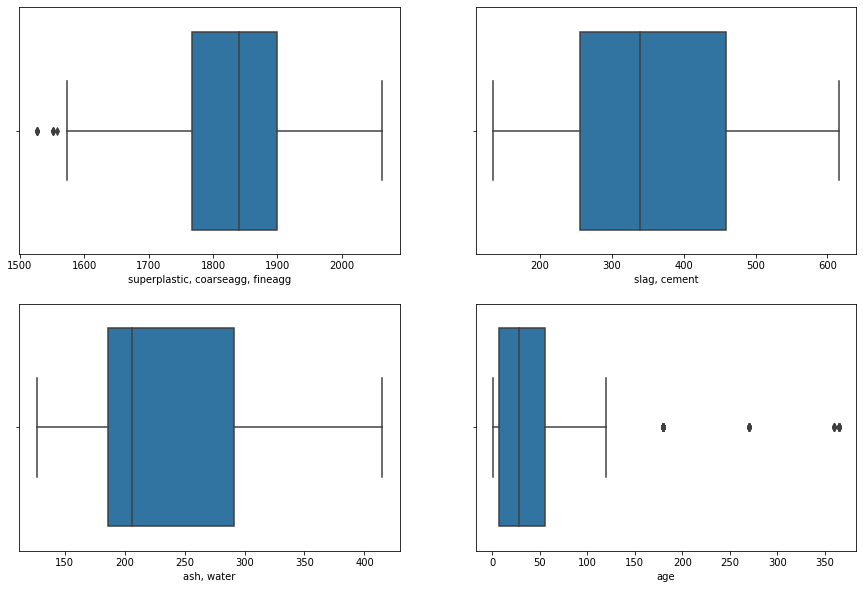

In [31]:
plt.figure(figsize=(15,10))
pos = 1
for i in df[['superplastic, coarseagg, fineagg','slag, cement','ash, water','age']].columns:
    plt.subplot(2, 2, pos)
    sns.boxplot(df[i])
    pos += 1 
    
# we could potentially treat the outliers we see below. But we can quickly try some 
# models without any outliers being treated.

# we will try to fit the models and then record stores. Then come back and think more about treating these 
# outliers as well as doing more feature engineering

# for now we have 4 coloumns
# 1 superplastic, coarseagg, fineagg
# 2 slag, cement
# 3 ash, water
# 4 age
# which were all originally dependent variable


# Start Modelling

In [32]:
#let's create the model
#simple linear regression

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from numpy.polynomial.polynomial import polyfit

In [33]:
X = df_features[['superplastic, coarseagg, fineagg','slag, cement','ash, water','age']]
y = df_features[['strength']]

In [34]:
#split training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
pd.DataFrame(X_test)

,"superplastic, coarseagg, fineagg","slag, cement","ash, water",age
339,1878.7,393.0,192.0,90
244,1698.0,393.0,192.0,90
882,1839.5,213.5,328.8,14
567,1936.0,338.0,193.0,28
923,1820.0,310.0,192.0,7
...,...,...,...,...
1018,1813.0,262.0,291.0,28
1015,1700.0,298.0,293.0,28
341,1841.0,181.4,336.6,100
750,1683.4,350.5,330.0,28


# LINEAR REGRESSION

In [36]:
#1 let's try the Linear Regression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for superplastic, coarseagg, fineagg is 0.028020454815542873
The coefficient for slag, cement is 0.10765027908463472
The coefficient for ash, water is 0.08463578501157548
The coefficient for age is 0.0902825473095993


In [37]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -77.8131424998995


# Fit train data to various results and graph the regression result between Actual vs Prediction

In [38]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

,model,score_train,score_test,features,hyperparameters
0,LinearRegression,0.429787,0.482202,depedent variables combined,
0,RidgeRegression,0.429787,0.482202,depedent variables combined,
0,LassoRegression,0.429786,0.482061,depedent variables combined,
0,DT_regressor,0.994830,0.744398,depedent variables combined,
0,RF_regressor,0.977495,0.844409,depedent variables combined,


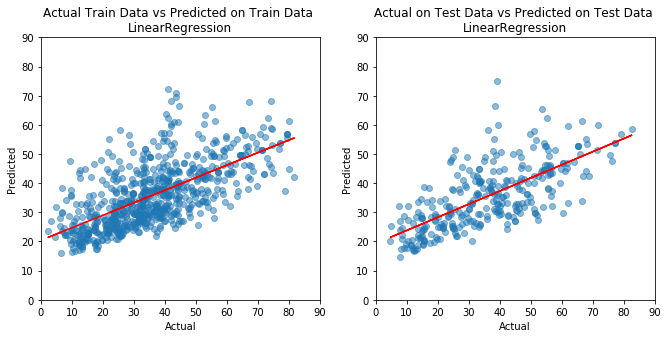

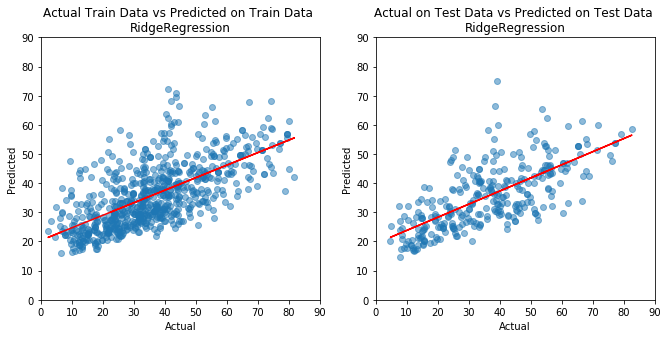

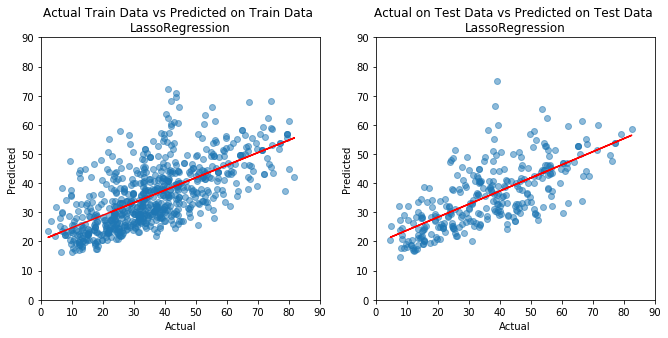

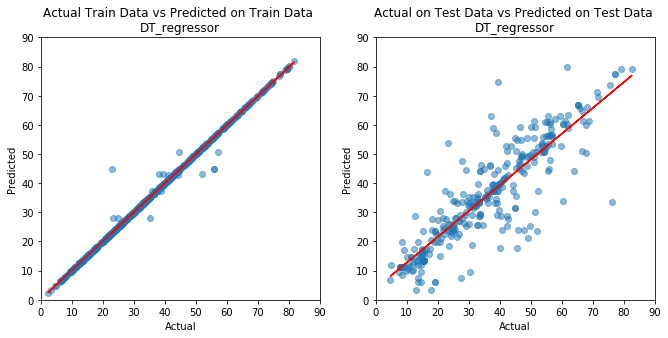

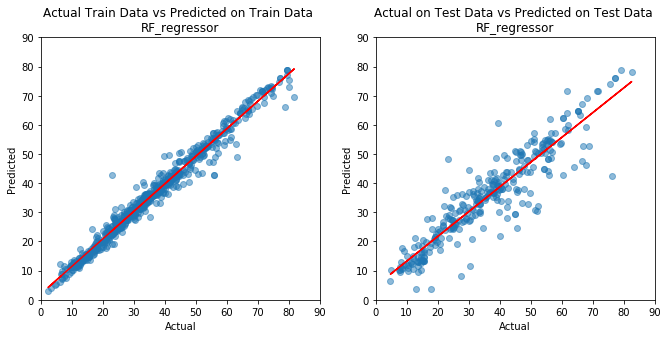

In [39]:
def modelname(model):
    if model == 'LinearRegression':
        regression_model = LinearRegression()
        return regression_model.fit(X_train, y_train)
    elif model == 'RidgeRegression':
        ridge = Ridge(alpha=.3)
        return ridge.fit(X_train,y_train)
    elif model =='LassoRegression':
        lasso = Lasso(alpha=.3)
        return lasso.fit(X_train,y_train)
    elif model == 'DT_regressor':
        DT_Regressor = DecisionTreeRegressor(random_state = 0)
        return DT_Regressor.fit(X_train, y_train) 
    elif model == 'RF_regressor':
        RF_Regressor = RandomForestRegressor(n_estimators = 50, random_state = 1)
        return RF_Regressor.fit(X_train, y_train)


models = ['LinearRegression','RidgeRegression','LassoRegression','DT_regressor','RF_regressor']
resultsdf = None

for j in range(1,1+len(models)) :
    
    plt.figure(figsize = (11,28))
    plt.subplot(5,2,(2*j)-1)
    #
    y_pred_train = modelname(models[j-1]).predict(X_train)
    m1, b1 = polyfit(y_train.to_numpy().flatten(), y_pred_train.flatten(),1)
    #
    plt.scatter(x=y_train.to_numpy(), y = y_pred_train, alpha = 0.5)
    plt.plot(y_train.to_numpy().flatten(),
             m1 + y_train.to_numpy() * b1, '-', color = 'r')
    plt.title("Actual Train Data vs Predicted on Train Data \n" + 
              models[j-1])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,90)
    plt.ylim(0,90)
    #
    plt.subplot(5,2,2*j)    
    y_pred = modelname(models[j-1]).predict(X_test)
    m1, b1 = polyfit(y_test.to_numpy().flatten(), y_pred.flatten(),1)

    plt.scatter(x=y_test.to_numpy(), y = y_pred, alpha = 0.5)
    plt.plot(y_test.to_numpy().flatten(),
             m1 + y_test.to_numpy() * b1, '-', color = 'r')
    plt.title("Actual on Test Data vs Predicted on Test Data \n" +
              models[j-1])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,90)
    plt.ylim(0,90)  
    tempresultsdf = pd.DataFrame({'model':[models[j-1]], 
                                  'score_train':[modelname(models[j-1]).score(X_train, y_train)],
                                  'score_test':[modelname(models[j-1]).score(X_test, y_test)], 
                                  'features':['depedent variables combined'],
                                  'hyperparameters':[''], 
                                 })
    resultsdf = pd.concat([resultsdf, tempresultsdf])
    resultsdf.drop_duplicates(subset=None, keep='first', inplace=True)

resultsdf         


Linear Regression, Lasso and Ridge (with alpha =0.3) is showing similar results. DT regressor is very over-fitted where it performs well on training but performs relatively very poor in test. 


Random Forest performs relatively well in training but also loses some accuraxy in testing.

# POLYNOMIAL FEATURES

In [40]:
from sklearn.preprocessing import PolynomialFeatures

,model,score_train,score_test,poly_features
0,LinearRegression_2,0.639912,0.636648,"PolynomialFeatures(degree=2, include_bias=True..."
0,RidgeRegression_2,0.639909,0.636825,"PolynomialFeatures(degree=2, include_bias=True..."
0,LassoRegression_2,0.618416,0.621961,"PolynomialFeatures(degree=2, include_bias=True..."
0,LinearRegression_3,0.779036,0.737150,"PolynomialFeatures(degree=3, include_bias=True..."
0,RidgeRegression_3,0.778993,0.737006,"PolynomialFeatures(degree=3, include_bias=True..."
0,LassoRegression_3,0.744619,0.716867,"PolynomialFeatures(degree=3, include_bias=True..."
0,DT_Regressor_3,0.994830,0.772122,"PolynomialFeatures(degree=3, include_bias=True..."
0,RF_Regressor_3,0.975298,0.841698,"PolynomialFeatures(degree=3, include_bias=True..."


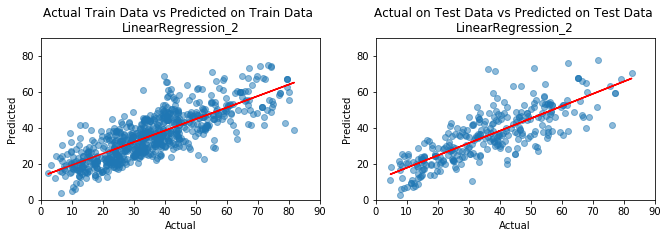

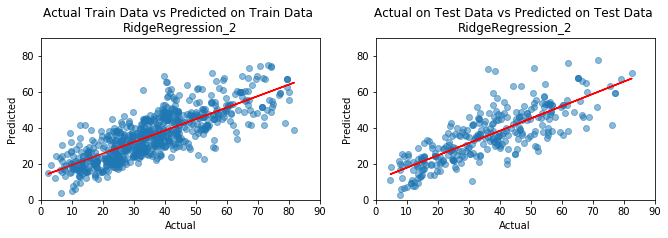

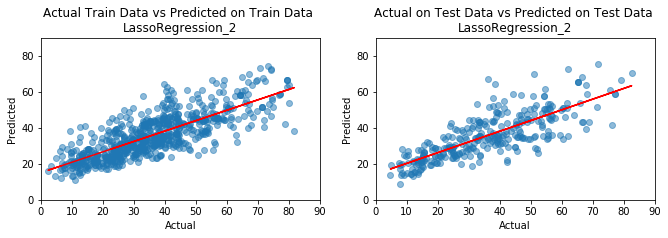

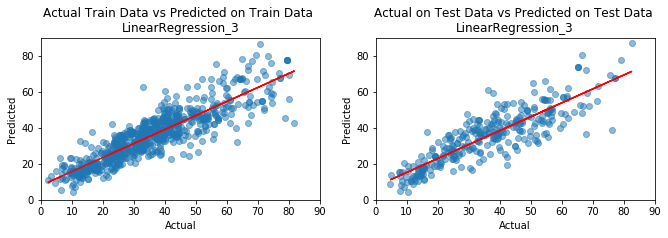

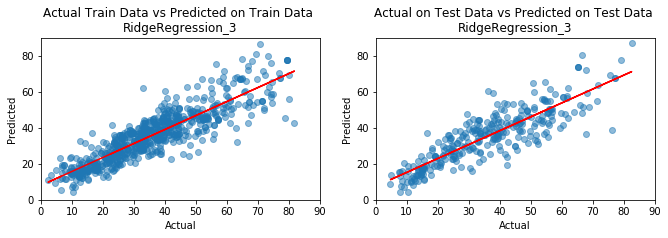

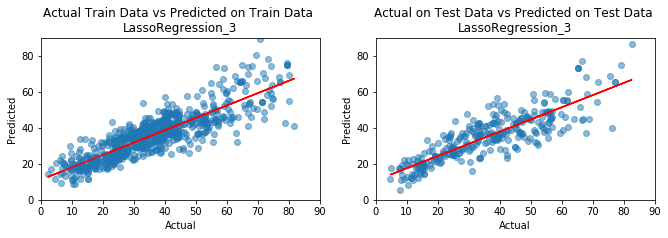

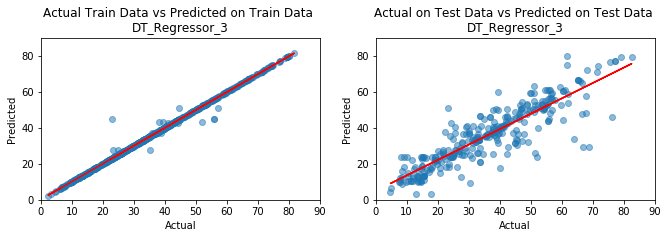

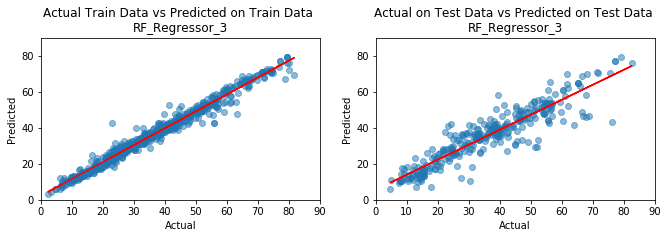

In [41]:
def poly_selection(deg):
    a = deg
    poly = PolynomialFeatures(degree = a, interaction_only=False)
    X_scaled = preprocessing.scale(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  
    y_scaled = preprocessing.scale(y)
    y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 
    X_poly = poly.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
    #print(a)
    return X_train, X_test, y_train, y_test, poly
    

def modelname_poly(model):
    if model == 'LinearRegression_2':
        poly_selection(2)
        regression_model_2 = LinearRegression()
        return regression_model_2.fit(poly_selection(2)[0], poly_selection(2)[2]), poly_selection(2)
    elif model == 'RidgeRegression_2':
        poly_selection(2)
        ridge_2 = Ridge(alpha=.3)
        return ridge_2.fit(poly_selection(2)[0], poly_selection(2)[2]), poly_selection(2)
    elif model =='LassoRegression_2':
        poly_selection(2)
        lasso_2 = Lasso(alpha=.3)
        return lasso_2.fit(poly_selection(2)[0], poly_selection(2)[2]), poly_selection(2)
    elif model == 'LinearRegression_3':
        poly_selection(3)
        regression_model_3 = LinearRegression()
        return regression_model_3.fit(poly_selection(3)[0], poly_selection(3)[2]) , poly_selection(3)
    elif model == 'RidgeRegression_3':
        poly_selection(3)
        ridge_3 = Ridge(alpha=.3)
        return ridge_3.fit(poly_selection(3)[0], poly_selection(3)[2]),poly_selection(3)
    elif model == 'LassoRegression_3':
        poly_selection(3)
        lasso_3 = Lasso(alpha=.3)
        return lasso_3.fit(poly_selection(3)[0], poly_selection(3)[2]),poly_selection(3)
    elif model == 'DT_Regressor_3':
        poly_selection(3)
        DT_Regressor_3 = DecisionTreeRegressor(random_state = 0)
        return DT_Regressor_3.fit(poly_selection(3)[0], poly_selection(3)[2]) ,poly_selection(3)
    elif model == 'RF_Regressor_3':
        poly_selection(3)
        RD_Regressor = RandomForestRegressor(n_estimators = 50, random_state = 1)
        return RD_Regressor.fit(poly_selection(3)[0], poly_selection(3)[2]),poly_selection(3)


models_poly = ['LinearRegression_2','RidgeRegression_2','LassoRegression_2',
         'LinearRegression_3','RidgeRegression_3','LassoRegression_3', 'DT_Regressor_3', 'RF_Regressor_3']
resultsdf_poly = pd.DataFrame()

for j in range(1,1+len(models_poly)) :
    a = modelname_poly(models_poly[j-1])[0]
    b = modelname_poly(models_poly[j-1])[1]
    plt.figure(figsize = (11,28))
    plt.subplot(8,2,(2*j)-1)
    #
    y_pred_train = modelname_poly(models_poly[j-1])[0].predict(b[0])
    m1, b1 = polyfit(b[2].to_numpy().flatten(), y_pred_train.flatten(),1)
    #
    plt.scatter(x=b[2].to_numpy(), y = y_pred_train, alpha = 0.5)
    plt.plot(b[2].to_numpy().flatten(),
             m1 + b[2].to_numpy() * b1, '-', color = 'r')
    plt.title("Actual Train Data vs Predicted on Train Data \n" + 
              models_poly[j-1])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,90)
    plt.ylim(0,90)
    #
    plt.subplot(8,2,2*j)    
    y_pred = modelname_poly(models_poly[j-1])[0].predict(b[1])
    m1, b1 = polyfit(b[3].to_numpy().flatten(), y_pred.flatten(),1)

    plt.scatter(x=b[3].to_numpy(), y = y_pred, alpha = 0.5)
    plt.plot(b[3].to_numpy().flatten(),
             m1 + b[3].to_numpy() * b1, '-', color = 'r')
    plt.title("Actual on Test Data vs Predicted on Test Data \n" +
              models_poly[j-1])
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0,90)
    plt.ylim(0,90)  
    tempresultsdf_poly = pd.DataFrame({'model':[models_poly[j-1]], 
                                  'score_train':[modelname_poly(models_poly[j-1])[0].score(b[0], b[2])],
                                  'score_test':[modelname_poly(models_poly[j-1])[0].score(b[1], b[3])],  
                                    'poly_features': b[4]
                                 })
    resultsdf_poly = pd.concat([resultsdf_poly, tempresultsdf_poly])
    resultsdf_poly.drop_duplicates(subset=None, keep='first', inplace=True)
    #print(b[4])

resultsdf_poly        


Increasing poly features from 2 to 3 increases accuracy. Linear Regression, Lasso and Ridge (with alpha =0.3) is showing similar results. DT regressor is very over-fitted where it performs well on training but performs relatively very poor in test.

Random Forest performs relatively well in training but also loses some accuraxy in testing

# Grid Search

We shall seek to improve by carrying out Grid Search on DT and RF

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
poly = PolynomialFeatures(degree = 3, interaction_only=False)
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)

In [44]:
modelname(models[1])

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
param_grid_lsso_rdge = {'alpha': list(np.arange(0,1,0.1))}
gs_lasso = GridSearchCV(modelname(models[1]),param_grid_lsso_rdge,cv=10)

In [46]:
gs_lasso.fit(X_train, y_train)
gs_lasso.best_params_

{'alpha': 0.6000000000000001}

In [47]:
gs_lasso.cv_results_['params']

[{'alpha': 0.0},
 {'alpha': 0.1},
 {'alpha': 0.2},
 {'alpha': 0.30000000000000004},
 {'alpha': 0.4},
 {'alpha': 0.5},
 {'alpha': 0.6000000000000001},
 {'alpha': 0.7000000000000001},
 {'alpha': 0.8},
 {'alpha': 0.9}]

In [48]:
gs_lasso.cv_results_['mean_test_score']

array([0.73890022, 0.73917215, 0.73920851, 0.73923448, 0.73925122,
       0.73925964, 0.73926055, 0.73925457, 0.73924227, 0.73922411])

Doing gridsearch on ridge regression alpha does not yield any distinctive results

In [49]:
modelname(models[3])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
                'max_depth': list(range(9,10)),
             'min_samples_split': list(range(4,8)),
              'min_samples_leaf':list(range(5,8))
             }
gs = GridSearchCV(modelname(models[3]),param_grid,cv=10)

In [51]:
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [52]:
gs.cv_results_['params']

[{'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 5,
  'min_samples_split': 4},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 5,
  'min_samples_split': 5},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 5,
  'min_samples_split': 6},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 5,
  'min_samples_split': 7},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 6,
  'min_samples_split': 4},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 6,
  'min_samples_split': 5},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 6,
  'min_samples_split': 6},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 6,
  'min_samples_split': 7},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 7,
  'min_samples_split': 4},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 7,
  'min_samples_split': 5},
 {'criterion': 'mse',
  'max_depth': 9,
  'min_samples_leaf': 7,
  'min_samples_

In [53]:
gs.cv_results_['mean_test_score']

array([0.78527046, 0.78527046, 0.78527046, 0.78527046, 0.78444261,
       0.78444261, 0.78444261, 0.78444261, 0.79192296, 0.79192296,
       0.79192296, 0.79192296, 0.78634598, 0.78634598, 0.78634598,
       0.78634598, 0.78785987, 0.78785987, 0.78785987, 0.78785987,
       0.78705324, 0.78705324, 0.78705324, 0.78705324, 0.78874206,
       0.78874206, 0.78874206, 0.78874206, 0.77151639, 0.77151639,
       0.77151639, 0.77151639, 0.77292347, 0.77292347, 0.77292347,
       0.77292347])

Doing gridsearch on Decision Tree does not yield obvious improvement

In [54]:
modelname(models[4])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [55]:
param_grid_RF = {'n_estimators': list(np.arange(50,150,25)),
                 'max_depth': list(range(5,6)),
             'min_samples_split': list(range(3,7)),
              'min_samples_leaf':list(range(5,8))
             }
gs_RF = GridSearchCV(modelname(models[4]),param_grid_RF,cv=10)

In [56]:
gs_RF.fit(X_train, y_train)
gs_RF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 125}

In [57]:
gs_RF.cv_results_['params']

[{'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 3,
  'n_estimators': 50},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 3,
  'n_estimators': 75},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 3,
  'n_estimators': 100},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 3,
  'n_estimators': 125},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 50},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 75},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 100},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 125},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 50},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 75},
 {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_es

In [58]:
gs_RF.cv_results_['mean_test_score']

array([0.80625836, 0.80538905, 0.8068725 , 0.8070584 , 0.80625836,
       0.80538905, 0.8068725 , 0.8070584 , 0.80625836, 0.80538905,
       0.8068725 , 0.8070584 , 0.80625836, 0.80538905, 0.8068725 ,
       0.8070584 , 0.80572656, 0.80491527, 0.80604992, 0.80612864,
       0.80572656, 0.80491527, 0.80604992, 0.80612864, 0.80572656,
       0.80491527, 0.80604992, 0.80612864, 0.80572656, 0.80491527,
       0.80604992, 0.80612864, 0.80426237, 0.80458178, 0.80533356,
       0.80501834, 0.80426237, 0.80458178, 0.80533356, 0.80501834,
       0.80426237, 0.80458178, 0.80533356, 0.80501834, 0.80426237,
       0.80458178, 0.80533356, 0.80501834])

# Random Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
modelname(models[4])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [61]:
param_grid_RF_RS = {'n_estimators': list(np.arange(50,150,25)),
                 'max_depth': list(range(3,10)),
             'min_samples_split': list(range(1,10)),
              'min_samples_leaf':list(range(1,2)), 'max_features': list(range(3,10))
             }
rs_RF = RandomizedSearchCV(modelname(models[4]),param_distributions=param_grid_RF_RS, n_iter=50)

In [62]:
rs_RF.fit(X_train, y_train)
print(rs_RF.best_params_)

{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 9}


In [63]:
print(rs_RF.score(X_test,y_test))
rs_RF.score(X_train,y_train)

0.8417288395859021


0.9560684720678071

In [64]:
rs_RF.cv_results_['mean_test_score']

array([0.83999834, 0.82864808, 0.85129377,        nan,        nan,
       0.77007985, 0.8396764 , 0.81076965, 0.85293387,        nan,
              nan, 0.73493451,        nan, 0.82623801, 0.83692206,
       0.84525409, 0.8292277 , 0.84068544,        nan, 0.70687355,
       0.84855081, 0.8060414 , 0.84234033, 0.84882513, 0.82579729,
       0.72835113, 0.84156643, 0.84177566, 0.82309158, 0.85044026,
       0.72742235, 0.78279052,        nan, 0.81049804, 0.83442332,
       0.83362462, 0.778813  , 0.70541862, 0.72928513, 0.81042282,
       0.84205048, 0.84828357, 0.79567672,        nan, 0.83755369,
       0.82981248,        nan, 0.83684347, 0.81147365, 0.72941452])

Random Forest Random Search yields the best result with


{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 9}


however this is still very much overfitted